In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
df["OverallQual"]

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

In [3]:
#check the overall situation of our goal: our goal is the sale price
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

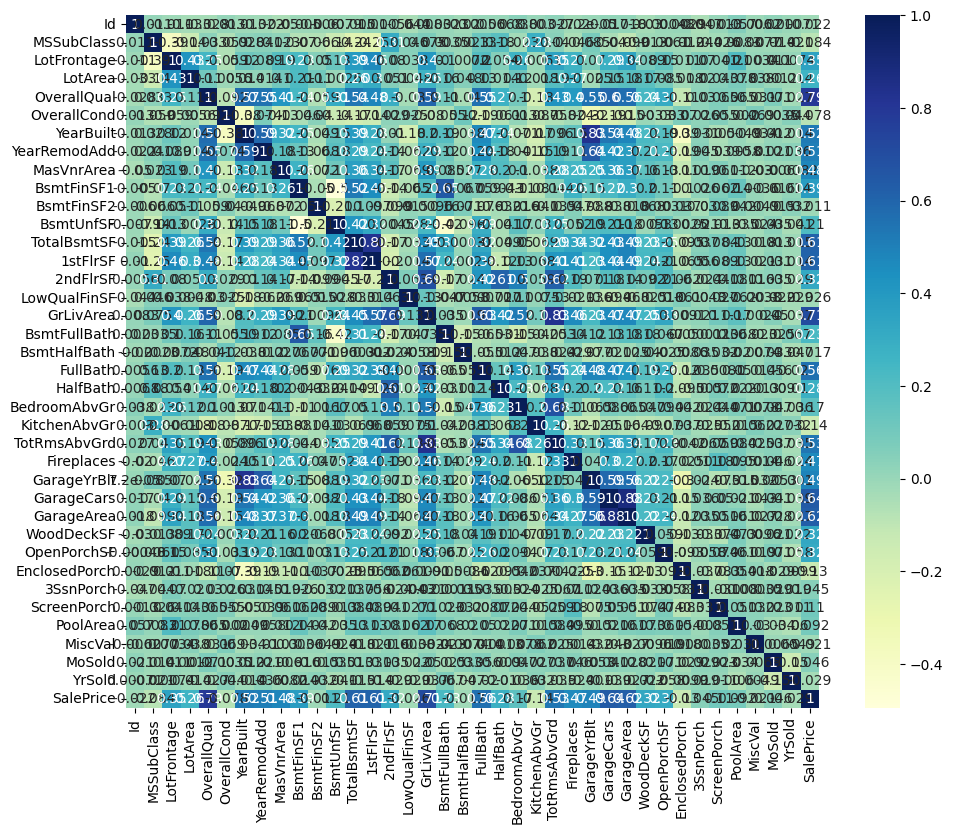

In [4]:
#using correlation to check which variables are more correlated to our goal(sale price)

# Drop non-numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the figure and axes
f, ax = plt.subplots(figsize=(12, 9))#create a figure and axes to draw

# Create heatmap
sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True, cmap="YlGnBu")#vmax shows that maximum value is 1, square is the shape, annot is the annotations, cmap is the color

# Display the plot
plt.show()

#from the graph, we can see that OverallQual and GrLivArea with the darkest blue, they are more correlated!!!

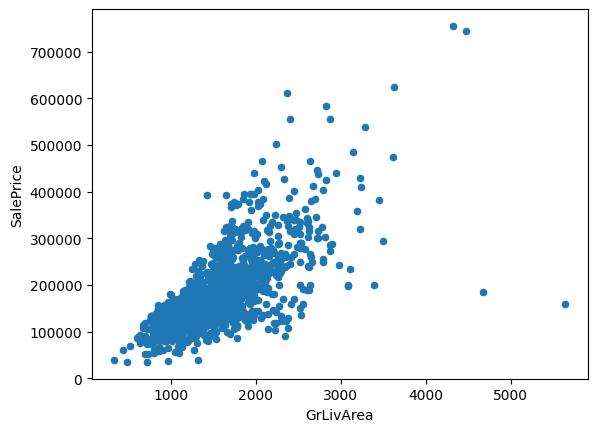

In [5]:
#first, we check about the GrLivArea
#we check about its outliers (异常值)
data = pd.concat([df["SalePrice"], df["GrLivArea"]], axis = 1)#A new DataFrame called data is created by concatenating the "SalePrice" and "GrLivArea" columns from the original DataFrame df.
data.plot.scatter(x = "GrLivArea", y = "SalePrice")
plt.show()

#then we found that there are two outliers on the bottom right corner!!!

Outliers to be removed:
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
523    524          60       RL        130.0    40094   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   
523          Bnk    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1298      1   2008       New        Partial     160000  
523      10   2007       New        Partial     184750  

[2 rows x 81 columns]


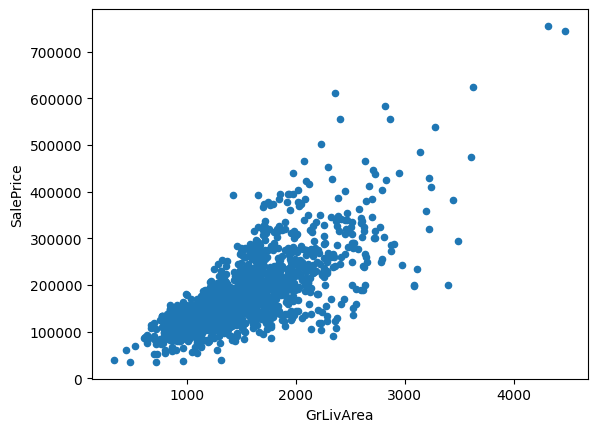

In [6]:
#so we delete it
outliers = df.sort_values(by = "GrLivArea", ascending = False)[:2]
print("Outliers to be removed:")
print(outliers)

df = df.drop(df[df["Id"] == 1299].index)
df = df.drop(df[df["Id"] == 524].index)

data = pd.concat([df["SalePrice"], df["GrLivArea"]], axis = 1)
data.plot.scatter(x = "GrLivArea", y = "SalePrice")
plt.show()

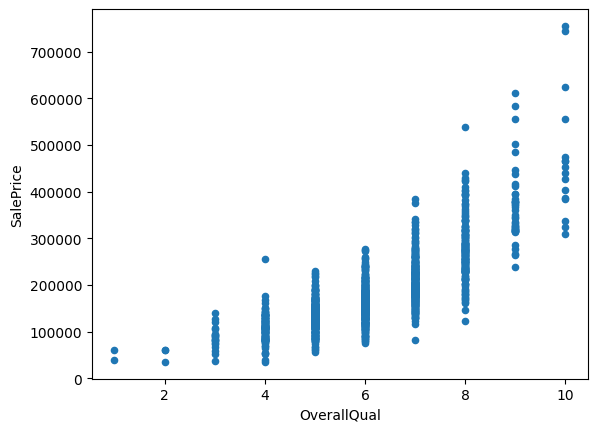

In [7]:
#second: we use the same method to check OverallQual
#we check about its outliers (异常值)
data = pd.concat([df["SalePrice"], df["OverallQual"]], axis = 1)#A new DataFrame called data is created by concatenating the "SalePrice" and "OverallQual" columns from the original DataFrame df.
data.plot.scatter(x = "OverallQual", y = "SalePrice")
plt.show()

In [8]:
outliers = df.sort_values(by = "OverallQual", ascending = False)[:6]
print("Outliers to be removed:")
print(outliers)

Outliers to be removed:
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
389    390          60       RL         96.0    12474   Pave   NaN      Reg   
185    186          75       RM         90.0    22950   Pave   NaN      IR2   
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
515    516          20       RL         94.0    12220   Pave   NaN      Reg   
1373  1374          20       RL          NaN    11400   Pave   NaN      Reg   
994    995          20       RL         96.0    12456   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
389          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
185          Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
691          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
515          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1373         Lvl    AllPub  ... 

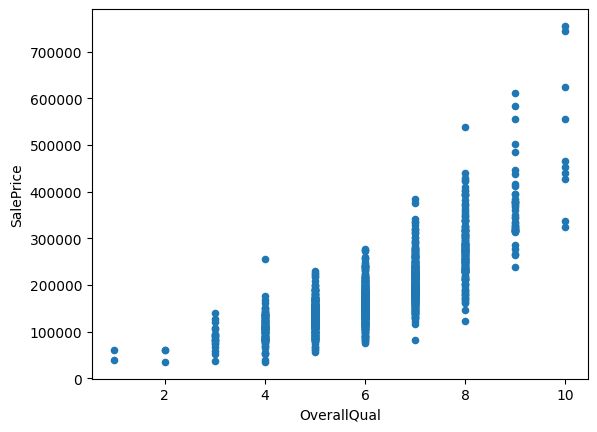

In [9]:
df = df.drop(df[df["Id"] == 516].index)
df = df.drop(df[df["Id"] == 1443].index)
df = df.drop(df[df["Id"] == 826].index)
df = df.drop(df[df["Id"] == 1244].index)
df = df.drop(df[df["Id"] == 186].index)
df = df.drop(df[df["Id"] == 225].index)



data = pd.concat([df["SalePrice"], df["OverallQual"]], axis = 1)
data.plot.scatter(x = "OverallQual", y = "SalePrice")
plt.show()

In [10]:
#build the model
features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea"]
X = df[features]
y = df["SalePrice"]

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest model
rf_model = RandomForestRegressor()

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)


In [11]:
from sklearn.metrics import mean_squared_error

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 1016839302.2975659


In [12]:
print(y_pred)

[180096.         131813.8        244164.27        67620.
  58264.21        84700.         145567.8        130717.5
 138831.41        67125.         126147.         275260.77
 138848.6        139383.5        339919.56       174728.6
 110659.         170586.9        207877.5        378359.51
 220852.55       127968.25       217326.77       145371.82
 182299.60095238 145928.5        182985.2375     108684.82564103
 146895.         123305.4        134421.25       196868.79
 153692.         132474.37       110872.         182610.
 153483.74       182427.25        89473.47        84700.
 137816.         124219.51333333 102248.34365079 323586.13
 120181.45       342211.91       217355.         154656.72
 147990.29       270566.55       149408.66666667 157456.
 174853.65       141313.         204714.4        146490.
  96086.44       127265.         397019.71       153785.74
 127190.16666667 111198.98       280763.21       139570.92857143
 111114.25       134042.5        336825.27       143955.

In [13]:
print(y_test)

1041    173000
1129    140000
1002    232000
1323     82500
533      39300
         ...  
899     135000
1333    125500
1415    175900
719     128500
256     207500
Name: SalePrice, Length: 291, dtype: int64


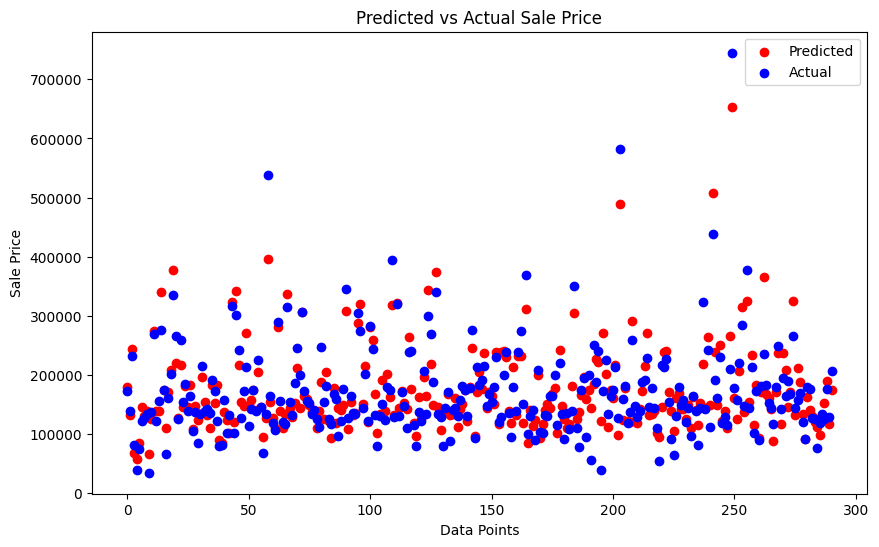

In [14]:
import matplotlib.pyplot as plt

# Plotting the predicted values and actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.xlabel('Data Points')
plt.ylabel('Sale Price')
plt.title('Predicted vs Actual Sale Price')
plt.legend()
plt.show()

In [15]:
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test = df_test.drop("Id", axis = 1)
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [16]:
columns = test.columns.to_list
print(columns)
features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea"]

<bound method IndexOpsMixin.tolist of Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 

In [17]:
test = test.fillna(1)  # Fill all the missing values as 1
print(test)

if df_test.empty:
    print("DataFrame df_test is empty. Please check the data.")

elif any(feature not in test.columns for feature in features):
    print("One or more features are not present in df_test. Please verify the feature names.")

else:
    X = test[features]
    y = rf_model.predict(X)
    print(y)
    


      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             20       RH         80.0    11622   Pave     1      Reg   
1             20       RL         81.0    14267   Pave     1      IR1   
2             60       RL         74.0    13830   Pave     1      IR1   
3             60       RL         78.0     9978   Pave     1      IR1   
4            120       RL         43.0     5005   Pave     1      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454         160       RM         21.0     1936   Pave     1      Reg   
1455         160       RM         21.0     1894   Pave     1      Reg   
1456          20       RL        160.0    20000   Pave     1      Reg   
1457          85       RL         62.0    10441   Pave     1      Reg   
1458          60       RL         74.0     9627   Pave     1      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub    Inside  ...  

In [18]:
#get output
output = pd.DataFrame({'Id': df_test.Id,'SalePrice': y})
output.to_csv('submission.csv', index=False)
output

,Id,SalePrice
0,1461,129220.200000
1,1462,161196.600000
2,1463,156142.050000
3,1464,179842.000000
4,1465,224864.680000
...,...,...
1454,2915,94648.809524
1455,2916,84414.440476
1456,2917,143209.990000
1457,2918,98462.666667
